In [ ]:
#1. Implement Simple Naive Bayes classification algorithm using Python/R on iris.csv dataset.
#2. Compute Confusion matrix to find TP, FP, TN, FN, Accuracy, Error rate, Precision, Recall on the given dataset. 

In [71]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score,ConfusionMatrixDisplay,classification_report

In [72]:
# Load the dataset
dataset = pd.read_csv('Iris.csv')
dataset

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [84]:
dataset.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [91]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [93]:
# Split the dataset into independent and dependent variables
X = dataset.iloc[:,1:5].values
y = dataset.iloc[:, -1].values
print(X.shape)

(150, 4)


In [74]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [75]:
# Feature Scaling to bring the variable in a single scale
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [76]:
# Train the Naive Bayes model
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [77]:
# Make predictions on the testing set
y_pred = classifier.predict(X_test)

In [94]:
#lets see the actual and predicted value side by side
y_compare = np.vstack((y_test,y_pred)).T
#actual value on the left side and predicted value on the right hand side
#printing the top 5 values
y_compare

array([['Iris-virginica', 'Iris-virginica'],
       ['Iris-versicolor', 'Iris-versicolor'],
       ['Iris-setosa', 'Iris-setosa'],
       ['Iris-virginica', 'Iris-virginica'],
       ['Iris-setosa', 'Iris-setosa'],
       ['Iris-virginica', 'Iris-virginica'],
       ['Iris-setosa', 'Iris-setosa'],
       ['Iris-versicolor', 'Iris-versicolor'],
       ['Iris-versicolor', 'Iris-versicolor'],
       ['Iris-versicolor', 'Iris-versicolor'],
       ['Iris-virginica', 'Iris-virginica'],
       ['Iris-versicolor', 'Iris-versicolor'],
       ['Iris-versicolor', 'Iris-versicolor'],
       ['Iris-versicolor', 'Iris-versicolor'],
       ['Iris-versicolor', 'Iris-versicolor'],
       ['Iris-setosa', 'Iris-setosa'],
       ['Iris-versicolor', 'Iris-versicolor'],
       ['Iris-versicolor', 'Iris-versicolor'],
       ['Iris-setosa', 'Iris-setosa'],
       ['Iris-setosa', 'Iris-setosa'],
       ['Iris-virginica', 'Iris-virginica'],
       ['Iris-versicolor', 'Iris-versicolor'],
       ['Iris-setosa', '

In [79]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(cm)

Confusion Matrix:
[[13  0  0]
 [ 0 16  0]
 [ 0  0  9]]


In [80]:
# Compute the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))

Accuracy: 1.00


In [81]:
# Compute the error rate of the model
error_rate = 1 - accuracy
print('Error Rate:', error_rate)

# Compute the precision of the model
precision = precision_score(y_test, y_pred, average='weighted')
print('Precision:', precision)

# Compute the recall of the model
recall = recall_score(y_test, y_pred, average='weighted')
print('Recall:', recall)

# Compute the F1 score of the model
f1 = f1_score(y_test, y_pred, average='weighted')
print('F1 Score:', f1)

Error Rate: 0.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


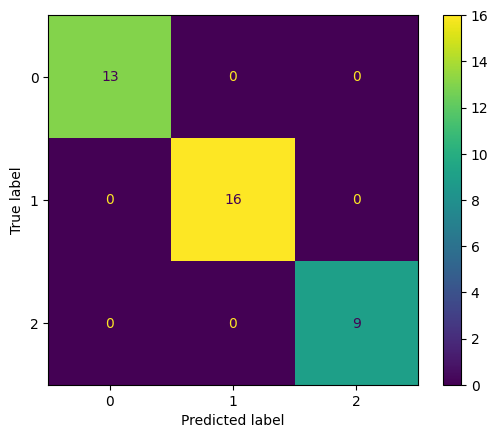

In [82]:
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()

In [83]:
print(classification_report(y_test,y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      1.00      1.00        16
 Iris-virginica       1.00      1.00      1.00         9

       accuracy                           1.00        38
      macro avg       1.00      1.00      1.00        38
   weighted avg       1.00      1.00      1.00        38

